![alt text](https://image.noelshack.com/fichiers/2019/47/6/1574505382-5da48ca7903cd7114c5a1f631d083fdf.jpg)

# Test technique - Session 11/2019
___


# Introduction
Nous allons ensemble étudier la rentabilité d'un code de promotion, permettant à ses utilisateurs de multiplier leurs points de fidélité par 5 durant une période de 5 jours.

***

# Sommaire

1. [Partie 0: Nettoyage des données](#Clean)


2. [Partie 1: Avoir un aperçu de la façon dont le code promotionnel a été utilisé](#Part1) <br/>

    1. [le nombre de personnes qui le réclament](#Claim)
    2. [le nombre de personnes qui en ont bénéficié](#Benefited)
    3. [le taux de conversion](#Conversion)
    4. [nombre de courses effectué avec ce code promotionnel](#Ridesnb)
    5. [répartition des utilisateurs par statut de fidélité](#Users)
    6. [répartition des courses effectuées par chaque statut de fidélité](#Rides)

3. [Partie 2: était-ce une bonne campagne ?](#Part2)
    1. [Coût de la campagne](#Cost)
    2. [Revenus additionnels générés par la campagne](#Incomes)
    3. [Calcul du ROI](#ROI)
    
    
---

## Partie 0: Nettoyage des données <a name="Clean"></a>

Nous commencerons donc par analyser grossièrement les deux dataset qui nous sont donnés, `events.csv` et `rides.csv`.
Pour ce faire nous utiliserons les fonctions `head`, `describe`,  `info` et l'attribut `dtypes`.<br/>
Celles-ci nous permettront de voir ce qu'il va être important de faire pour nettoyer les données.

###### Events.csv

In [2]:
import pandas as pd
events = pd.read_csv("events.csv")
events.head(5)

,event_id,ride_id,type,user_id,promocode_name
0,457113065c424d25eff17823ad888162,NaN,other_coupon_action,c045abae8a3110ea6cec54b2f49f9f2d,89f13478125cee693ce7f76fedf01808
1,06e5ceb932743b583dc4349f617d1fde,NaN,coupon_created,c33cc932b7a4feb6f51d7ed1077faa05,8041613eff4408b9268b66430cf5d9a1
2,f08b5f110a9e2e9c3eac3f03e8ad801b,NaN,coupon_created,da03b00f7dd32fa31b800ecb762ef1df,308dd493382b32ebf486da92fdeaf38d
3,4265bc09df57f4fb6991f832b24e643c,NaN,coupon_created,0928a1d559774b05be5e6926920d2873,c4afe8e1914a1f612ca82d59ec72c771
4,4a5d1f58698acb12ca4da6b24535693d,NaN,coupon_created,960025162805d2c5942334c5ed200528,308dd493382b32ebf486da92fdeaf38d


In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292309 entries, 0 to 292308
Data columns (total 5 columns):
event_id          292309 non-null object
ride_id           102431 non-null object
type              292309 non-null object
user_id           292309 non-null object
promocode_name    292309 non-null object
dtypes: object(5)
memory usage: 11.2+ MB


On remarque que la colonne `ride_id` est peu utilisée. De plus il nous est demandé de ne pas nous en servir dans notre analyse.<br/>
Nous n'aurons pas non plus besoin de la colonne `event_id`<br/>
Nous pouvons donc supprimer ces deux colonnes grâce à la fonction `drop` <br/>
ici l'attribut `inplace` nous permet de modifier le dataframe et non pas une copie

In [4]:
events.drop(['event_id', 'ride_id'], axis=1, inplace=True)
events.head()

,type,user_id,promocode_name
0,other_coupon_action,c045abae8a3110ea6cec54b2f49f9f2d,89f13478125cee693ce7f76fedf01808
1,coupon_created,c33cc932b7a4feb6f51d7ed1077faa05,8041613eff4408b9268b66430cf5d9a1
2,coupon_created,da03b00f7dd32fa31b800ecb762ef1df,308dd493382b32ebf486da92fdeaf38d
3,coupon_created,0928a1d559774b05be5e6926920d2873,c4afe8e1914a1f612ca82d59ec72c771
4,coupon_created,960025162805d2c5942334c5ed200528,308dd493382b32ebf486da92fdeaf38d


###### rides.csv

In [5]:
rides = pd.read_csv("rides.csv")
rides.head()

,ride_id,user_id,loyalty.status,booking_id,isGuest,loyalty_points_earned,price.loyalty.points_spent,price_nominal,price_after_discount,state,quote_date
0,357a545ef665da69dd86ac33ae817f3a,c6f3a631ae33a84c343dd9c553889337,1,1ea36f95a86a5a876456ce66587f4882,False,0,NaN,5.48,5.80,not_completed,2017-03-01 11:07:49
1,5714536c4b4b1b10c4cd8ac907537044,0bad5fc7936b072d8de8749b9dd608c6,1,NaN,False,0,NaN,4.72,4.72,not_completed,2017-03-02 22:45:02
2,5c8f5dec570b6597090f8b30ea33b0af,0bad5fc7936b072d8de8749b9dd608c6,1,NaN,False,5,NaN,4.72,4.72,completed,2017-03-02 22:45:22
3,0f37be24f23a15746eb8774e7a1bd934,37169a3d6636e14afabb1dbe01f5c83e,0,NaN,False,8,NaN,7.68,7.68,completed,2017-03-03 00:22:45
4,67f054abb8b60132dd7c19cb30e74e10,b89d8219faa82966c7b33ee69b484ad2,3,NaN,False,7,NaN,4.00,4.00,completed,2017-03-04 03:32:15


Ici nous n'avons pas besoin des colonnes `ride_id`, `booking_id`, `isGuest` et `price_nominal` .<br/>
Nous pouvons donc les enlever de notre dataframe

In [6]:
rides.drop(['ride_id', 'booking_id', 'isGuest', 'price_nominal'], axis=1, inplace=True)

In [7]:
rides.dtypes

user_id                        object
loyalty.status                  int64
loyalty_points_earned           int64
price.loyalty.points_spent     object
price_after_discount          float64
state                          object
quote_date                     object
dtype: object

Nous pouvons convertir la date au format **dateTime** pour plus de facilité par la suite

In [8]:
rides["quote_date"] = pd.to_datetime(rides["quote_date"])

## Partie 1: avoir un aperçu de la façon dont le code promotionnel a été utilisé <a name="Part1"></a>

### A. Le nombre de personnes qui le réclament  <a name="Claim"></a>

Pour avoir le nombre d'utilisateurs qui ont demandé le code, nous gardons uniquement les lignes dont l'attribut `promocode_name` vaut **promocode** et comme précisé dans l'enoncé nous ne nous soucions que des lignes dont l'attribut `type` vaut **coupon_created** .<br/>
il nous suffit ensuite de voir le nombre de valeur unique prise par la feature `user_id` 

*Nous sauvgardons la liste de ces utilisateur dans un tableau numpy pour plus tard*

In [9]:
events_promocode = events[(events["promocode_name"] == "promocode") & (events["type"] == "coupon_created")]
userWhoClaimed = events_promocode["user_id"].unique()
userWhoClaimedCount = userWhoClaimed.shape[0]
userWhoClaimedCount

9805

Nous avons donc **9805** utilisateurs qui ont demandé le promocode .

### B. Le nombre de personnes qui en ont bénéficié <a name="Benefited"></a>

Pour compter le nombre de personne qui ont bénéficié du promocode nous allons devoir filtrer le dataset `rides` pour ne garder que les courses qui ont bénéficié du promocode.

Nous gardons que les courses achevées ...

In [10]:
rides_completed = rides[rides["state"] == "completed"]

Qui ont Gagné des points ...

In [11]:
rides_completed_winPoints = rides_completed[rides_completed["loyalty_points_earned"] > 0]

Qui ont eu lieu entre le 15 et 21 mai 2017 ...

In [12]:
rides_completed_winPoints_inPeriod = rides_completed_winPoints[(rides_completed_winPoints['quote_date']>='2017-05-17') & (rides_completed_winPoints['quote_date'] <= '2017-05-22')]

> Ici la limite supérieure est le 22. En mettant le 21 comme limite nous n'obtenions pas les courses ayant eu lieu le 21

Et dont la valeur de la feature `user_id` se trouve dans le tableau des utilisateurs ayant réclamé le promocode sauvgardé précédemment. 


In [14]:
underProm_rides = rides_completed_winPoints_inPeriod[rides_completed_winPoints_inPeriod['user_id'].isin(userWhoClaimed)]

---
*On peut aussi récupérer cette liste en utilisant la fonction `merge` sur `user_id`*

In [15]:
benefited_users = pd.merge(rides_completed_winPoints_inPeriod, events_promocode, on="user_id")

---

il nous suffit ensuite de voir le nombre de valeur unique prise par la feature `user_id` pour avoir le nombre d'utilisateurs ayant bénéficié du promocode grâce à la fonction `unique`

In [16]:
userWhoUsed = underProm_rides['user_id'].unique()
userWhoUsedCount = userWhoUsed.shape[0]
userWhoUsedCount

6877

Nous avons donc **6877** utilisateurs qui ont bénéficié du promocode

### C. Le taux de conversion 

$taux\,de \, conversion = \frac{userWhoUsed}{userWhoClaimed}\times100$

In [17]:
(userWhoUsedCount/userWhoClaimedCount) * 100

70.13768485466598

Le taux de conversion est donc de **70,1 %**

### D. Nombre de courses effectuées avec ce promocode  <a name="Ridesnb"></a>

In [18]:
underPromoCode = rides_completed_winPoints_inPeriod[rides_completed_winPoints_inPeriod["user_id"].isin(userWhoClaimed)]

La fonction `len` nous permet d'avoir le nombre de lignes du dataframe 

In [19]:
len(underProm_rides)

16684

Nous avons donc **16684** courses effectuées avec le promocode

### E. Répartition des utilisateurs par statut de fidélité <a name="Users"></a>

Nous allons commencer par enregistrer dans un tableau tout les utilisateurs en fonction de leur statut

In [20]:
userByLoyalty = []
userByLoyaltyCount = []

for i in range(0,4):
    userByLoyalty.append(rides[rides['loyalty.status'] == i]['user_id'].unique())
    
for tmp in userByLoyalty:
    userByLoyaltyCount.append(tmp.size)

Nous avons un tableau des utilisateurs ayant réclamé le promocode : **userWhoClaimed** <br/>
Nous aurons besoin d'un tableau des uutilisateurs n'ayant pas réclamé le promocode : **userWhoNotClaimed**

>Ici nous prenons en compte que les utilisateurs n'ayant pas réclamé le promocode n'ont pas forcément gagné de point pendant leurs courses

In [21]:
rides_completed_inPeriod = rides_completed[(rides_completed['quote_date']>='2017-05-17') & (rides_completed['quote_date'] <= '2017-05-22')]
userWhoNotClaimed = rides[~(rides['user_id'].isin(userWhoClaimed))]['user_id'].unique()

Nous construisons un dataframe réunissant toutes les courses réalisé sans promocode 

In [22]:
notUnderProm_rides = rides_completed_inPeriod[rides_completed_inPeriod['user_id'].isin(userWhoNotClaimed)]

Nous construisons deux dataframes contenant le compte des utilisateurs pas statuts:
* Un pour les courses **ayant bénéficié du promocode
* Un pour les courses **n'ayant pas bénéficié** du promocode

In [23]:
underPromLoyaltyCount = pd.DataFrame({'count'})
notUnderPromLoyaltyCount = pd.DataFrame({'count'})

for i in range(4):
    underPromLoyaltyCount.loc[i] = (underProm_rides[underProm_rides['user_id'].isin(userByLoyalty[i])].shape[0])

for i in range(4):
    notUnderPromLoyaltyCount.loc[i] = (notUnderProm_rides[notUnderProm_rides['user_id'].isin(userByLoyalty[i])].shape[0])

Pour pouvoir afficher des graphiques nous concatainons les deux dataframes grâce à la fonction `concat`

In [24]:
ridesByLoyalty = pd.concat([underPromLoyaltyCount, notUnderPromLoyaltyCount], axis=1, ignore_index=False)

Nous pouvons maintenant afficher les graphiques en camembert de la répartition de utilisateurs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BBC7638D0>,
      dtype=object)

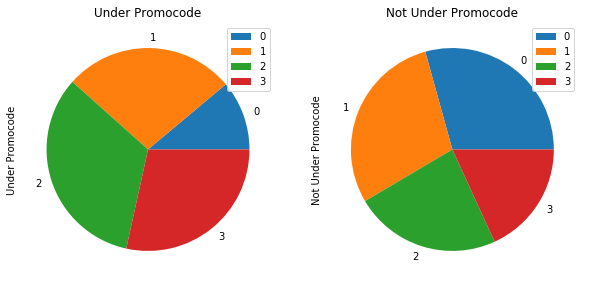

In [40]:
ridesByLoyalty.columns=['Under Promocode', 'Not Under Promocode']
ridesByLoyalty.plot(kind="pie", subplots =True, title=['Under Promocode', 'Not Under Promocode'], figsize = (10,10))

Nous remarquons deux choses:
* Les courses ayant bénéficié du promocode sont effectuées en majorité par les utilisateurs de statut 2 et 3
* Les courses n'ayant pas bénéficié du promocode sont effectuées en majorité par les utilisateurs de statut 0 et 1

### F. Répartition des courses par de fidélité <a name="Rides"></a>

Nous allons céer un tableau et créer une case par statut. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BA48CDB70>],
      dtype=object)

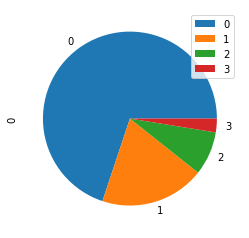

In [27]:
userByLoyalty = []
userByLoyaltyCount = []
userByLoyaltyWhoClaimed = []

for i in range(0,4):
    userByLoyalty.append(rides[rides['loyalty.status'] == i]['user_id'].unique())
    
for tmp in userByLoyalty:
    userByLoyaltyCount.append(tmp.size)
    

# for element in userWhoClaimed:
#     for i in range(0,4):
#         if element in userByLoyalty[]
    
df_userByLoyaltyCount = pd.DataFrame(userByLoyaltyCount)
df_userByLoyaltyCount.plot(kind='pie', subplots = True, title="Users by status")

## Partie 2: était-ce une bonne campagne ? <a name="Part2"></a>

### A. Coût de la campagne <a name="Cost"></a>

Nous commençons par calculer le nombre de points donné pendant la campagne. <br/>
Il nous est dit que toutes les courses éligibles gagnaient 5 fois plus de points qu'à l'accoutumée. <br/>
le nombre de points donné est donc égal au nombre de point gagné habituellement fois 4.

In [28]:
underProm_rides['givenPoints'] = underProm_rides['loyalty_points_earned'] * 4 

C:\Users\Martin\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Il nous ai dit dans la documentation que chaque point vaut environ 0.1€
Pour avoir le prix de la campagne il nous suffit donc de multiplier le nombre total de point donnés (obtenus avec la fonction `sum`) par 0.1 

In [29]:
underProm_rides['givenPoints'].sum() * 0.1

60302.4

La campagne aura donc coûté **60302 €**

---
*Une autre méthode consiste à aller obtenir le nombre de point gagné par euro en fonction du statut sur*
[cette page](https://www.kapten.com/fr/passagers/programme-de-fidelite/)

On obtient ainsi les informations suivantes
* Temps normal
    * 0: 1€ = 1 points
    * 1: 1€ = 2 points
    * 2-3 : 1€ = 3 points


* Promocode x 5
    * 0: 1€ = 5 points: différence = 4 points/€
    * 1: 1€ = 10 points: différence = 8 points/€
    * 2-3: 1€ = 15 points: différence = 12 points/€*


In [30]:
import numpy as np

conditions = [(underProm_rides['loyalty.status'] == 0),
             (underProm_rides['loyalty.status'] == 1),
             (underProm_rides['loyalty.status'] == 2),
             (underProm_rides['loyalty.status'] == 3)]

choices = [(underProm_rides['price_after_discount'].apply(np.ceil)) * 4,
          (underProm_rides['price_after_discount'].apply(np.ceil)) * 8,
          (underProm_rides['price_after_discount'].apply(np.ceil)) * 12,
          (underProm_rides['price_after_discount'].apply(np.ceil)) * 12
          ]

underProm_rides['givenPoints_2'] = np.select(conditions, choices, default=0)


C:\Users\Martin\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


la fonction `np.select` va permettre de affecter une valeur (se trouvant dans le tableau `choices`) en fonction d'une conddition (se trouvant de le tableau `conditions`)

> une ligne ayant un `loyalty.status` égale à 1 aura pour valeur de `givenPoints_2`,  son `price_after_discount` multiplié par 8

In [31]:
underProm_rides['givenPoints_2'].sum() * 0.1

107394.40000000001

Avec cette méthode on obtient un coût de **107394 €**
***

Le nombre de points gagné par statut pouvant changer nous allons garder la première option pour la suite de cet exercice

### B. Revenus additionnels générés par la campagne <a name="Incomes"></a>

Pour calculer les revenus additionnels générés par la campagne nous allons d'abord récupérer la somme gagnée pour chaque utilisateur hors de la période de promotion.

In [41]:
rides_completed_outPeriod = rides_completed[((rides_completed['quote_date']<'2017-05-17') | (rides_completed['quote_date'] > '2017-05-21')) & rides_completed['user_id'].isin(userWhoClaimed)]
income_outPeriod = []
for user in userWhoUsed:
    income_outPeriod.append([user, rides_completed_outPeriod[rides_completed_outPeriod['user_id'] == user]['price_after_discount'].sum()])

>cette requête est gourmande en temps

Une fois récupérée,  nous calculons la moyenne des revenus pour chaque utilisateur, par jour puis pour 5 jours ( la durée de la promotion )

In [47]:
df_income_outPeriod = pd.DataFrame(income_outPeriod, columns=['user', 'totalIncome_outPeriod'])
df_income_outPeriod.set_index('user')
df_income_outPeriod['incomePerDay_outPeriod'] = df_income_outPeriod['totalIncome_outPeriod'] / rides_completed_outPeriod['quote_date'].dt.date.nunique()
df_income_outPeriod['incomeFor5Days_OutPeriod'] = df_income_outPeriod['incomePerDay_outPeriod'] * 5

Nous récupérons ensuite les revenus pour le même utilisateur mais cette fois pendant la durée de la campagne.

In [43]:
income_inPeriod = []
for user in userWhoUsed:
    income_inPeriod.append([user, underProm_rides[underProm_rides['user_id'] == user]['price_after_discount'].sum()])

>cette requête est gourmande en temps

On utilise ensuite la fonction `merge` pour réunir les deux dataframes au niveau de la colonne `user`

In [44]:
df_income_inPeriod = pd.DataFrame(income_inPeriod , columns = ['user', 'totalIncome_inPeriod'])
income_final = pd.merge(df_income_inPeriod, df_income_outPeriod, on='user')

On calcule les revenus additionnels générés faissant la somme des revenus additionnels pour chaque utilisateur.

In [45]:
income_final['earn'] = income_final['totalIncome_inPeriod'] - income_final['incomeFor5Days_OutPeriod']
income_final['earn'].sum()

49546.94873417722

la Campagne à donc générer **49546 €**

### C. Calcul du ROI <a name="ROI"></a>

$retour\,sur \, investissement = \frac{gain\, de\, l’investissement\, –\, coût\, de\, l’investissement}{coût\, de\, l’investissement\,}\times100$

In [46]:
((49546 - 60302) / 60302) * 100

-17.8368876654174

la campagne a donc un retour sur investissment négatif de 17,8%

On conclura donc que cette campagne n'a pas été profitable à la Kapten qui a perdu plus de **10 000 €** dessus.